In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# Initialize viruses dictionary
viruses = {}

# Read in viruses details and store in dictionary
with open("Olival_Nature_2017_Raw_Data/Olival_Species_Data/viruses.csv", 'r') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)
    for row in reader:
        viruses[row[0]] = {'Order': row[1], 'Family': row[2], 'SubFamily': row[3], 'Genus': row[4],
                           'IsTypeSpecies': row[5], 'ICTVnumber': row[6], 'ReverseZoonoses': row[7],
                           'IsHoSa': row[8], 'IsHoSa.stringent': row[9], 'GenomeMinLength': row[10],
                           'GenomeMaxLength': row[11], 'GenomeAveLength': row[12], 'WOKcites': row[13],
                           'PubMedCites': row[14], 'CytoReplicTF': row[15], 'SegmentedTF': row[16],
                           'VectorYNna': row[17], 'SSoDS': row[18], 'DNAoRNA': row[19], 'Envelope': row[20],
                           'IsZoonotic': row[21], 'IsZoonotic.stringent': row[22]}
        
csvfile.close()

print(viruses['Adelaide_River_virus'])

{'Order': 'Mononegavirales', 'Family': 'Rhabdoviridae', 'SubFamily': 'NA', 'Genus': 'Ephemerovirus', 'IsTypeSpecies': '0', 'ICTVnumber': 'NA', 'ReverseZoonoses': '0', 'IsHoSa': '0', 'IsHoSa.stringent': '0', 'GenomeMinLength': 'NA', 'GenomeMaxLength': 'NA', 'GenomeAveLength': '14627', 'WOKcites': '6', 'PubMedCites': '7', 'CytoReplicTF': 'TRUE', 'SegmentedTF': 'FALSE', 'VectorYNna': 'Y', 'SSoDS': 'SS', 'DNAoRNA': 'RNA', 'Envelope': 'enveloped', 'IsZoonotic': '0', 'IsZoonotic.stringent': '0'}


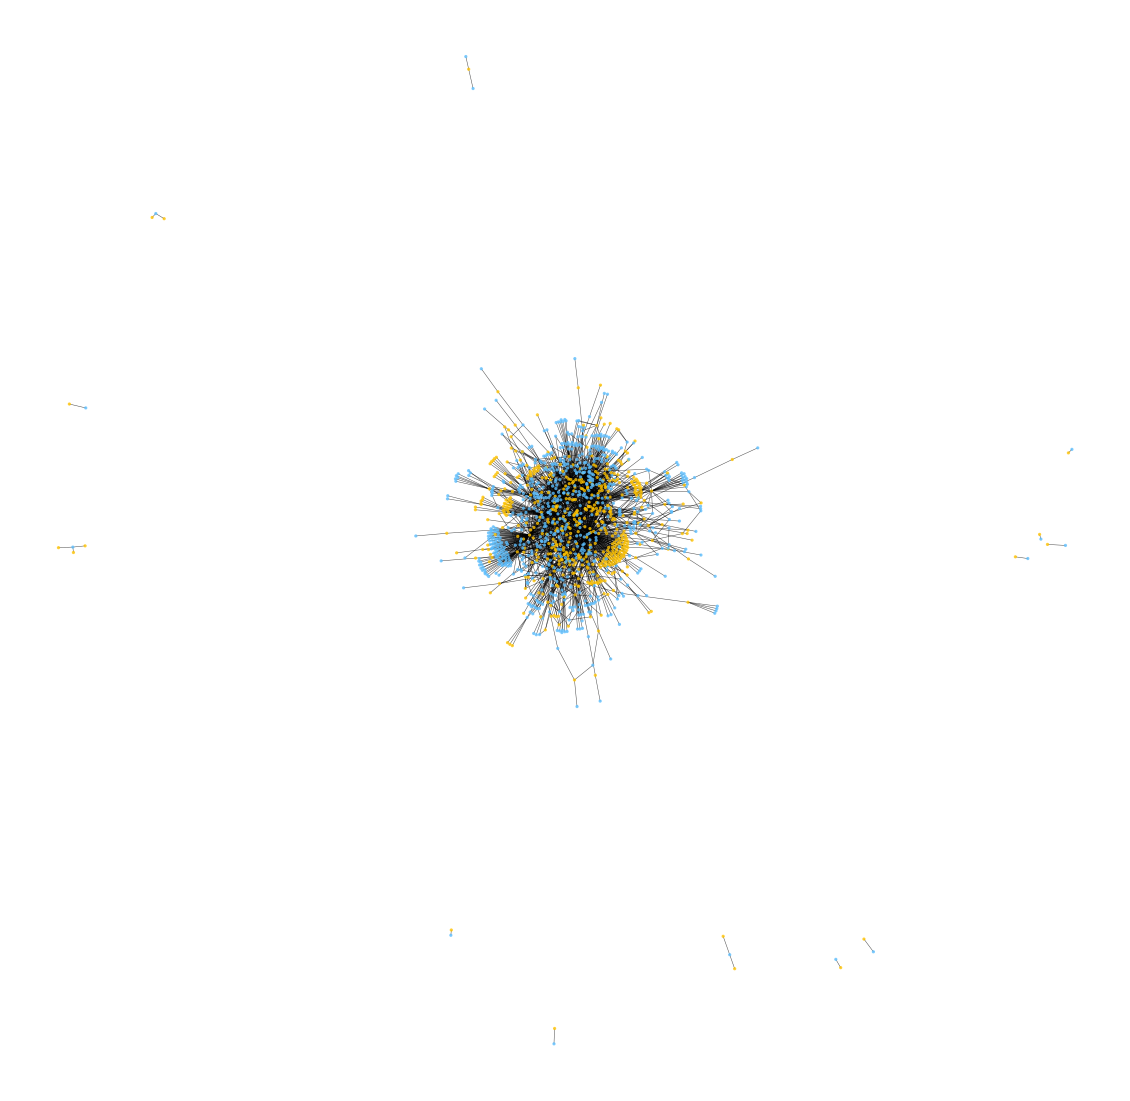

In [6]:
with open('Olival_Nature_2017_Raw_Data/Olival_Species_Data/Virus_Host_Connections.csv', 'r') as inFile:
    edges = inFile.readlines()
    
virus_names = []
host_names = []
# 0: Host, 1: Virus
for index in range(len(edges)):
    
    edges[index] = edges[index].strip()
    virus, host = edges[index].split(',')
    edges[index] = (virus,host)
    virus_names.append(virus)
    host_names.append(host)
    
G = nx.Graph()
G.add_edges_from(edges)
nx.set_node_attributes(G, viruses)
classifications = {}
node_colors = [-1]*len(G.nodes())
for index, node in enumerate(G.nodes()):
    
    if node in virus_names:
        classifications[node] = 1
        node_colors[index] = '#ffc300'
        
    elif node in host_names:
        classifications[node] = 0
        node_colors[index] = '#5cbefe'
        
    else:
        print('Some kind of error')
        
fig, ax = plt.subplots(figsize=(20,20))
nx.draw_networkx(G, with_labels=False, node_size=5, width=0.5, node_color=node_colors, ax=ax, alpha=0.7)
limits=plt.axis('off')
# turn off axes
plt.show() 

KeyError: 'Order'

In [4]:
def mean_geodesic(G, nreps):
    ells = []
    nodes_traversed = []
    ellms = []
    
    for r in range(nreps):
        # G = nx.fast_gnp_random_graph(n, p) # generate a simple G(n,p)
        dij = dict(nx.all_pairs_shortest_path_length(G))
        
        # Loop over each node in the APSP dictionary
        for key_outer_dict in dij:

            # Loop over each destination node in the sub-dictionary for the current node
            for key in dij[key_outer_dict]:

                # If the distance is non-zero (different nodes) and the node hasn't been traversed yet
                if (dij[key_outer_dict][key] != 0) and (dij[key_outer_dict][key] != np.Inf) and (dij[key_outer_dict][key] not in nodes_traversed):

                    # Append the shortest path from the current node to this node
                    ells.append(dij[key_outer_dict][key])

            # Add current node to the list of traversed nodes
            nodes_traversed.append(key_outer_dict)
        
        # Append mean from nreps to ellms
        ellms.append(np.mean(ells))

    ellmean = np.mean(ellms) 
    
    return ellmean

In [5]:
# Find number of nodes, edges, and clustering coefficient
n = len(G.nodes())
m = len(G.edges())
C = nx.transitivity(G)

# Find mean and stdDev of degree
degree_node_tuples = G.degree()
degrees = [i[1] for i in degree_node_tuples]
mean_degree = np.mean(degrees)
kstd = np.std(degrees)

# Find mean geodesic
ell_mean = mean_geodesic(G,3)

print('Number of nodes in Virus-Host Connections graph: {}'.format(n))
print('Number of edges in Virus-Host Connections graph: {}'.format(m))
print('Mean Degree of Virus Host Connection graph: {:.2f}'.format(mean_degree))
print('Standard deviation of degrees in Virus Host Connection: {:.2f}'.format(kstd))
print('Clustering coefficient for Virus-Host graph: {:.2f}'.format(C))
print('Mean Geodesic Path Length for Virus-Host graph: {:.2f}'.format(ell_mean))

Number of nodes in Virus-Host Connections graph: 1341
Number of edges in Virus-Host Connections graph: 2799
Mean Degree of Virus Host Connection graph: 4.17
Standard deviation of degrees in Virus Host Connection: 10.30
Clustering coefficient for Virus-Host graph: 0.00
Mean Geodesic Path Length for Virus-Host graph: 3.95


Text(0, 0.5, 'Pr(K >= k)')

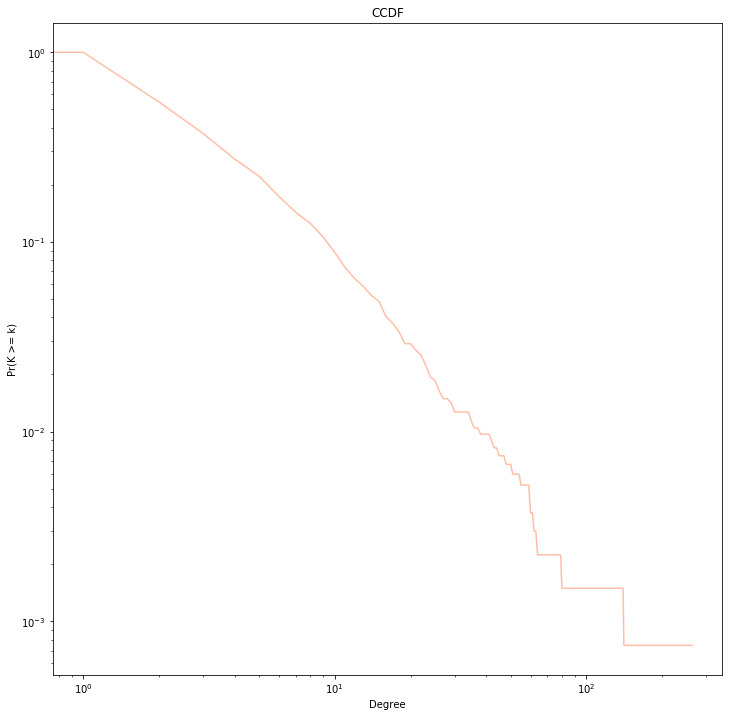

In [7]:
# log-log plot of CCDF
counts, bins = np.histogram(degrees,max(degrees)+1, (0,max(degrees)+1),density=True)
cumcounts = np.cumsum(counts)
cumcounts = np.insert(cumcounts,0,0)
fig, ax = plt.subplots(figsize=(12,12))
ax.loglog(bins[:-1],1-cumcounts[:-1], color='coral', alpha=0.5)
ax.set_title('CCDF')
ax.set_xlabel('Degree')
ax.set_ylabel('Pr(K >= k)')

In [8]:
def motifs(G):
    connected_triples = []
    FFL = 0
    FBL = 0
    
    for node in G.nodes:
        for neighbor in G.neighbors(node):
            for neighbor_2 in G.neighbors(neighbor):
                connected_triples.append([[node, neighbor],[neighbor,neighbor_2]])
                
    for triple in connected_triples:
        if G.has_edge(triple[0][0],triple[1][1]):
            FFL += 1
        if G.has_edge(triple[1][1],triple[0][0]):
            #print(triple,[triple[1][1],triple[0][0]])
            FBL += 1
            
    return FFL, int(FBL/3)

FFL, FBL = motifs(G)
print('Feedforward Loops: {}'.format(FFL))
print('Feedback Loops: {}'.format(FBL))

Feedforward Loops: 0
Feedback Loops: 0


This makes sense because due to the nature of the graph, it would not make sense for there to be any loops. An edge between hosts would not make sense, nor would an edge between viruses therefore we should theoretically have zero feedforward or feedback loops in this.